# Activation Functions in Natural Language Processing

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vuhung16au/nlp-learning-journey/blob/main/examples/activation-functions.ipynb)

## Overview

Activation functions are crucial components of neural networks, including those used in NLP. They introduce non-linearity, allowing the model to learn complex patterns. While many activation functions can be used, some are particularly common in NLP models.

## What You'll Learn

- Mathematical definitions of key activation functions used in NLP
- Visual representations and graphs of activation functions
- When and which functions suit NLP tasks best
- Practical implementations with examples
- Comparison of different activation functions

## Key Activation Functions for NLP

We'll focus on the most widely used activation functions in NLP:
- **ReLU (Rectified Linear Unit)**: Default for hidden layers
- **Sigmoid**: Used in gates and binary classification
- **Tanh (Hyperbolic Tangent)**: Zero-centered alternative to sigmoid
- **Softmax**: Essential for multi-class classification and probability distributions
- **GELU (Gaussian Error Linear Unit)**: Modern alternative used in transformers

## Prerequisites

Basic understanding of Python, neural networks, and mathematical concepts.

## Setup and Installation

In [4]:
# Environment Detection and Setup
import sys
import subprocess

# Detect the runtime environment
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules
IS_LOCAL = not (IS_COLAB or IS_KAGGLE)

print(f"Environment detected:")
print(f"  - Local: {IS_LOCAL}")
print(f"  - Google Colab: {IS_COLAB}")
print(f"  - Kaggle: {IS_KAGGLE}")

# Platform-specific system setup
if IS_COLAB:
    print("\nSetting up Google Colab environment...")
    !apt update -qq
    !apt install -y -qq libpq-dev
elif IS_KAGGLE:
    print("\nSetting up Kaggle environment...")
    # Kaggle usually has most packages pre-installed
else:
    print("\nSetting up local environment...")

# Install required packages for this notebook
required_packages = [
    "numpy",
    "matplotlib",
    "seaborn",
    "pandas",
    "plotly",
    "scipy"
]

print("\nInstalling required packages...")
for package in required_packages:
    if IS_COLAB or IS_KAGGLE:
        !pip install -q {package}
    else:
        subprocess.run([sys.executable, "-m", "pip", "install", "-q", package],
                      capture_output=True)
    print(f"✓ {package}")

print("\n🎉 Environment setup complete!")

Environment detected:
  - Local: False
  - Google Colab: True
  - Kaggle: False

Setting up Google Colab environment...
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
libpq-dev is already the newest version (14.19-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.

Installing required packages...
✓ numpy
✓ matplotlib
✓ seaborn
✓ pandas
✓ plotly
✓ scipy

🎉 Environment setup complete!


In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.special import erf
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("📊 All libraries imported successfully!")
print("🎨 Plotting style configured!")

📊 All libraries imported successfully!
🎨 Plotting style configured!


## Mathematical Definitions of Activation Functions

Let's start by defining the mathematical formulations of the key activation functions used in NLP.

### 1. ReLU (Rectified Linear Unit)

**Mathematical Definition:**

$$ \text{ReLU}(x) = \max(0, x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases} $$

**Derivative:**

$$ \text{ReLU}'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases} $$

**Properties:**
- **Range:** $[0, +\infty)$
- **Advantages:** Computationally efficient, addresses vanishing gradients
- **Disadvantages:** Can cause "dying ReLU" problem (neurons that never activate)
- **NLP Usage:** Default choice for hidden layers in most neural networks

### 2. Sigmoid Function

**Mathematical Definition:**

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

**Derivative:**

$$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$

**Properties:**
- **Range:** $(0, 1)$
- **Advantages:** Smooth, differentiable, outputs probabilities
- **Disadvantages:** Suffers from vanishing gradients, not zero-centered
- **NLP Usage:** Binary classification, gating mechanisms in LSTMs and GRUs

### 3. Hyperbolic Tangent (tanh)

**Mathematical Definition:**

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1} $$

**Derivative:**

$$ \tanh'(x) = 1 - \tanh^2(x) $$

**Properties:**
- **Range:** $(-1, 1)$
- **Advantages:** Zero-centered, smooth and differentiable
- **Disadvantages:** Still suffers from vanishing gradients
- **NLP Usage:** RNN hidden states, when zero-centered output is desired

### 4. Softmax Function

**Mathematical Definition:**

$$ \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} $$

**Numerically Stable Version:**

$$ \text{softmax}(x_i) = \frac{e^{x_i - \max(\mathbf{x})}}{\sum_{j=1}^{n} e^{x_j - \max(\mathbf{x})}} $$

**Properties:**
- **Range:** $(0, 1)$ for each element, with $\sum_{i=1}^{n} \text{softmax}(x_i) = 1$
- **Advantages:** Converts logits to probability distribution
- **NLP Usage:** Multi-class classification, attention mechanisms, language modeling output layer

**Example in NLP Context:**
- English: "My name is" → Vietnamese: "Tên tôi là"
- Softmax can output probabilities for each Vietnamese word in the vocabulary

### 5. GELU (Gaussian Error Linear Unit)

**Mathematical Definition:**

$$ \text{GELU}(x) = x \cdot \Phi(x) $$

where $\Phi(x)$ is the cumulative distribution function of the standard normal distribution.

**Approximation (commonly used):**

$$ \text{GELU}(x) \approx 0.5x\left(1 + \tanh\left(\sqrt{\frac{2}{\pi}}(x + 0.044715x^3)\right)\right) $$

**Properties:**
- **Range:** $(-\infty, +\infty)$
- **Advantages:** Smooth, non-monotonic, good performance in transformers
- **NLP Usage:** Used in BERT, GPT, and other modern transformer models

## Implementation of Activation Functions

Let's implement these activation functions in Python:

In [6]:
class ActivationFunctions:
    """Collection of activation functions commonly used in NLP."""

    @staticmethod
    def relu(x):
        """
        ReLU (Rectified Linear Unit) activation function.

        Args:
            x: Input array or scalar

        Returns:
            ReLU activated values
        """
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        """Derivative of ReLU function."""
        return (x > 0).astype(float)

    @staticmethod
    def sigmoid(x):
        """
        Sigmoid activation function.

        Args:
            x: Input array or scalar

        Returns:
            Sigmoid activated values
        """
        # Clip x to prevent overflow
        x_clipped = np.clip(x, -250, 250)
        return 1 / (1 + np.exp(-x_clipped))

    @staticmethod
    def sigmoid_derivative(x):
        """Derivative of sigmoid function."""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)

    @staticmethod
    def tanh(x):
        """
        Hyperbolic tangent activation function.

        Args:
            x: Input array or scalar

        Returns:
            Tanh activated values
        """
        return np.tanh(x)

    @staticmethod
    def tanh_derivative(x):
        """Derivative of tanh function."""
        return 1 - np.tanh(x) ** 2

    @staticmethod
    def softmax(x, axis=-1):
        """
        Softmax activation function (numerically stable).

        Args:
            x: Input array
            axis: Axis along which to apply softmax

        Returns:
            Softmax probability distribution
        """
        # Numerical stability: subtract max
        x_shifted = x - np.max(x, axis=axis, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

    @staticmethod
    def gelu(x):
        """
        GELU (Gaussian Error Linear Unit) activation function.
        Uses the approximation commonly implemented in practice.

        Args:
            x: Input array or scalar

        Returns:
            GELU activated values
        """
        return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

    @staticmethod
    def gelu_exact(x):
        """
        Exact GELU using the error function (erf).

        Args:
            x: Input array or scalar

        Returns:
            Exact GELU activated values
        """
        return 0.5 * x * (1 + erf(x / np.sqrt(2)))

# Test the implementations
print("✅ Activation functions implemented successfully!")

# Quick test with sample values
test_input = np.array([-2, -1, 0, 1, 2])
print(f"\nTest input: {test_input}")
print(f"ReLU: {ActivationFunctions.relu(test_input)}")
print(f"Sigmoid: {ActivationFunctions.sigmoid(test_input)}")
print(f"Tanh: {ActivationFunctions.tanh(test_input)}")
print(f"GELU: {ActivationFunctions.gelu(test_input)}")

✅ Activation functions implemented successfully!

Test input: [-2 -1  0  1  2]
ReLU: [0 0 0 1 2]
Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Tanh: [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]
GELU: [-0.04540231 -0.15880801  0.          0.84119199  1.95459769]


## Visualization of Activation Functions

Let's create graphs to visualize how these activation functions behave:

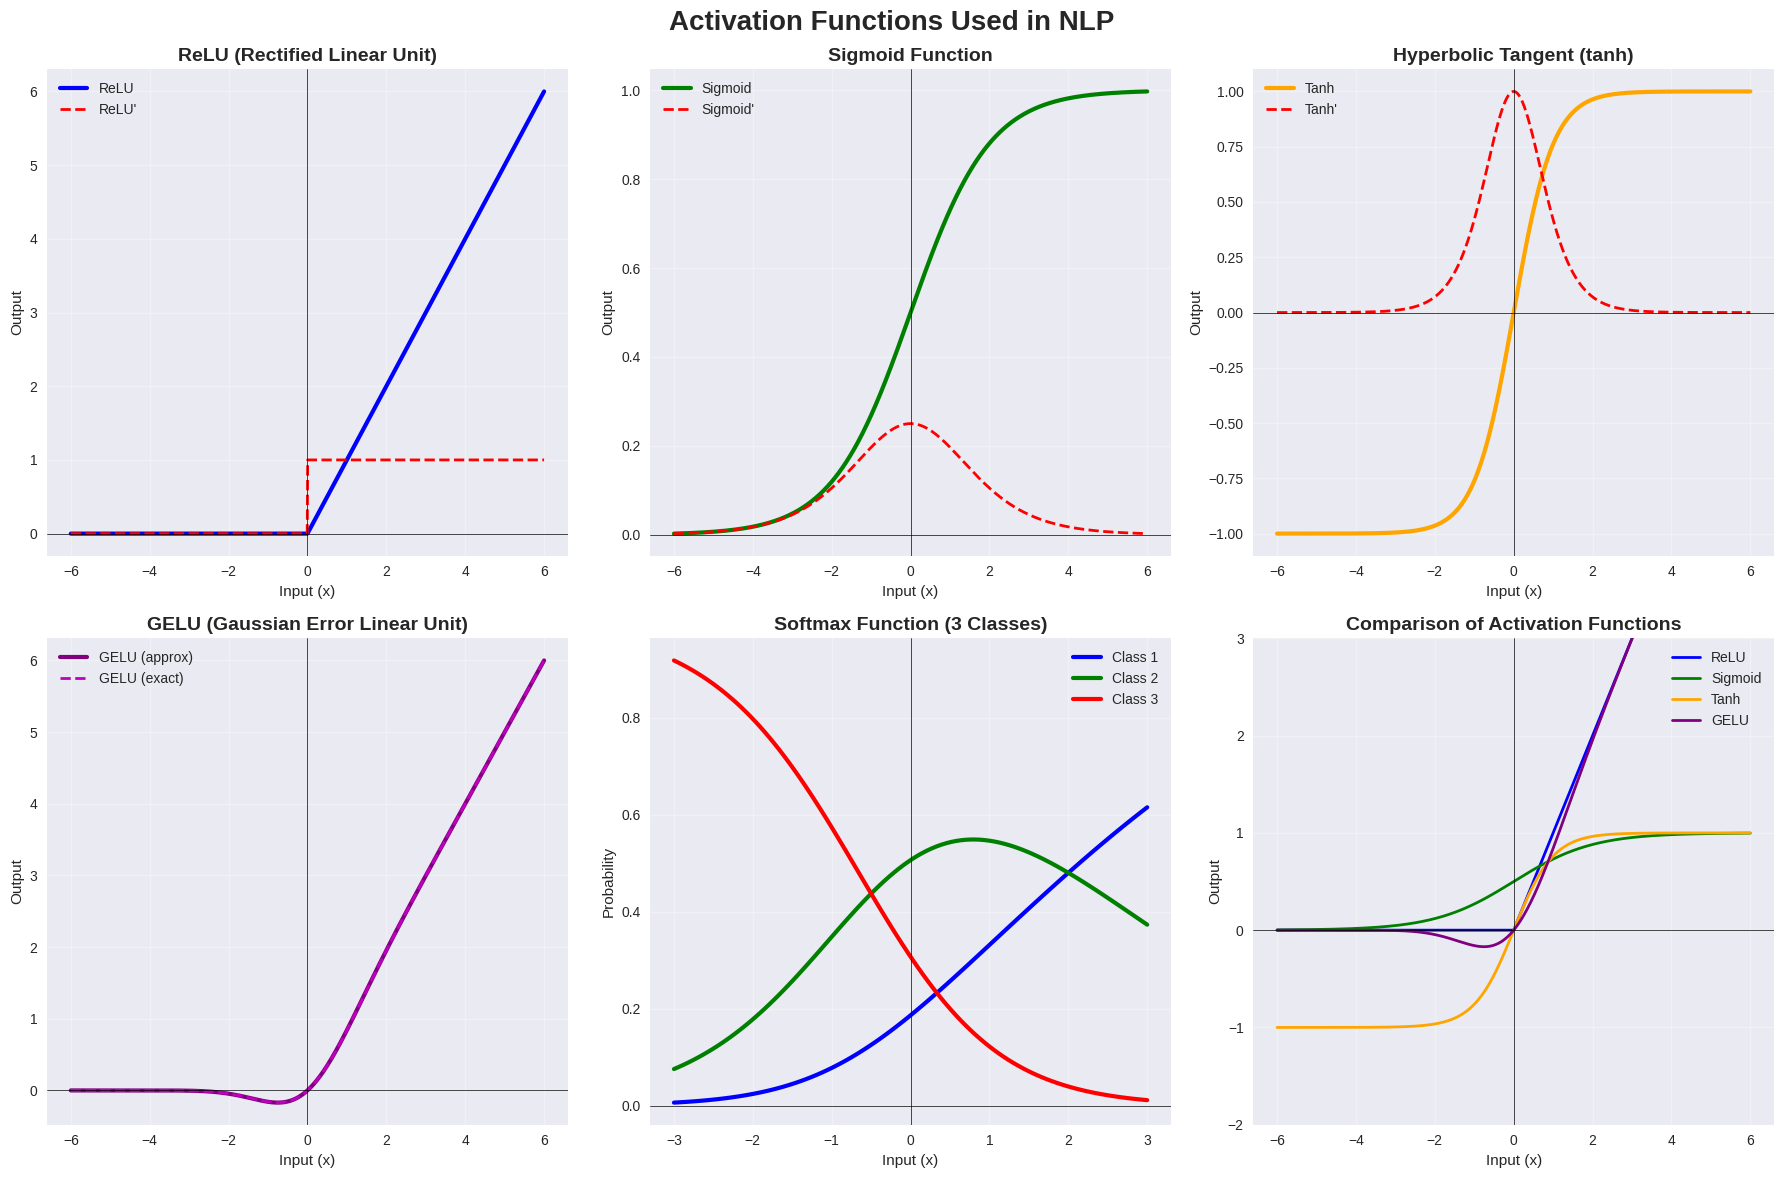

In [7]:
def plot_activation_functions():
    """Plot all activation functions for comparison."""

    # Generate input range
    x = np.linspace(-6, 6, 1000)

    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Activation Functions Used in NLP', fontsize=20, fontweight='bold')

    # Plot ReLU
    axes[0, 0].plot(x, ActivationFunctions.relu(x), 'b-', linewidth=3, label='ReLU')
    axes[0, 0].plot(x, ActivationFunctions.relu_derivative(x), 'r--', linewidth=2, label="ReLU'")
    axes[0, 0].set_title('ReLU (Rectified Linear Unit)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Input (x)')
    axes[0, 0].set_ylabel('Output')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
    axes[0, 0].axvline(x=0, color='k', linewidth=0.5)

    # Plot Sigmoid
    axes[0, 1].plot(x, ActivationFunctions.sigmoid(x), 'g-', linewidth=3, label='Sigmoid')
    axes[0, 1].plot(x, ActivationFunctions.sigmoid_derivative(x), 'r--', linewidth=2, label="Sigmoid'")
    axes[0, 1].set_title('Sigmoid Function', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Input (x)')
    axes[0, 1].set_ylabel('Output')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0, color='k', linewidth=0.5)
    axes[0, 1].axvline(x=0, color='k', linewidth=0.5)

    # Plot Tanh
    axes[0, 2].plot(x, ActivationFunctions.tanh(x), 'orange', linewidth=3, label='Tanh')
    axes[0, 2].plot(x, ActivationFunctions.tanh_derivative(x), 'r--', linewidth=2, label="Tanh'")
    axes[0, 2].set_title('Hyperbolic Tangent (tanh)', fontsize=14, fontweight='bold')
    axes[0, 2].set_xlabel('Input (x)')
    axes[0, 2].set_ylabel('Output')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].axhline(y=0, color='k', linewidth=0.5)
    axes[0, 2].axvline(x=0, color='k', linewidth=0.5)

    # Plot GELU
    axes[1, 0].plot(x, ActivationFunctions.gelu(x), 'purple', linewidth=3, label='GELU (approx)')
    axes[1, 0].plot(x, ActivationFunctions.gelu_exact(x), 'm--', linewidth=2, label='GELU (exact)')
    axes[1, 0].set_title('GELU (Gaussian Error Linear Unit)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Input (x)')
    axes[1, 0].set_ylabel('Output')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='k', linewidth=0.5)
    axes[1, 0].axvline(x=0, color='k', linewidth=0.5)

    # Plot Softmax example (3 inputs)
    x_soft = np.linspace(-3, 3, 100)
    # Create 3 different input patterns
    input1 = x_soft
    input2 = 0.5 * x_soft + 1
    input3 = -0.5 * x_soft + 0.5

    # Stack inputs and apply softmax
    inputs = np.stack([input1, input2, input3], axis=0)
    softmax_outputs = ActivationFunctions.softmax(inputs, axis=0)

    axes[1, 1].plot(x_soft, softmax_outputs[0], 'b-', linewidth=3, label='Class 1')
    axes[1, 1].plot(x_soft, softmax_outputs[1], 'g-', linewidth=3, label='Class 2')
    axes[1, 1].plot(x_soft, softmax_outputs[2], 'r-', linewidth=3, label='Class 3')
    axes[1, 1].set_title('Softmax Function (3 Classes)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Input (x)')
    axes[1, 1].set_ylabel('Probability')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
    axes[1, 1].axvline(x=0, color='k', linewidth=0.5)

    # Comparison plot
    axes[1, 2].plot(x, ActivationFunctions.relu(x), 'b-', linewidth=2, label='ReLU')
    axes[1, 2].plot(x, ActivationFunctions.sigmoid(x), 'g-', linewidth=2, label='Sigmoid')
    axes[1, 2].plot(x, ActivationFunctions.tanh(x), 'orange', linewidth=2, label='Tanh')
    axes[1, 2].plot(x, ActivationFunctions.gelu(x), 'purple', linewidth=2, label='GELU')
    axes[1, 2].set_title('Comparison of Activation Functions', fontsize=14, fontweight='bold')
    axes[1, 2].set_xlabel('Input (x)')
    axes[1, 2].set_ylabel('Output')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].axhline(y=0, color='k', linewidth=0.5)
    axes[1, 2].axvline(x=0, color='k', linewidth=0.5)
    axes[1, 2].set_ylim(-2, 3)

    plt.tight_layout()
    plt.show()

# Generate the plots
plot_activation_functions()

## NLP Applications and When to Use Each Function

Let's explore when and where each activation function is most suitable in NLP tasks:

In [8]:
def demonstrate_nlp_applications():
    """Demonstrate practical NLP applications of activation functions."""

    print("🔥 ACTIVATION FUNCTIONS IN NLP APPLICATIONS\n")
    print("=" * 60)

    # Example 1: Text Classification with Softmax
    print("\n📝 1. TEXT CLASSIFICATION WITH SOFTMAX")
    print("-" * 40)

    # Simulate logits for sentiment classification
    # English: "I love programming" → Vietnamese: "Tôi yêu lập trình"
    logits = np.array([
        [2.1, -1.2, 0.3],   # Sentence 1: "I love programming" - likely positive
        [-0.8, 2.5, -0.1],  # Sentence 2: "This is terrible" - likely negative
        [0.1, 0.2, 0.1]     # Sentence 3: "It's okay" - neutral
    ])

    class_names = ['Positive', 'Negative', 'Neutral']
    sentences = [
        'English: "I love programming" / Vietnamese: "Tôi yêu lập trình"',
        'English: "This is terrible" / Vietnamese: "Điều này thật tệ"',
        'English: "It\'s okay" / Vietnamese: "Không sao"'
    ]

    probabilities = ActivationFunctions.softmax(logits)

    for i, (sentence, probs) in enumerate(zip(sentences, probabilities)):
        print(f"\nSentence {i+1}: {sentence}")
        print(f"Logits: {logits[i]}")
        for j, (class_name, prob) in enumerate(zip(class_names, probs)):
            print(f"  {class_name}: {prob:.4f} ({prob*100:.1f}%)")
        predicted_class = class_names[np.argmax(probs)]
        print(f"  → Predicted: {predicted_class}")

    # Example 2: ReLU in Hidden Layers
    print("\n\n⚡ 2. ReLU IN HIDDEN LAYERS")
    print("-" * 40)

    # Simulate word embeddings being processed through ReLU
    word_embeddings = np.array([
        [-0.5, 0.8, -0.2, 1.2],  # "Hello" / "Xin chào"
        [0.3, -0.6, 0.9, -0.1],  # "world" / "thế giới"
        [-0.8, -0.3, 0.4, 0.7]   # "!" / "!"
    ])

    words = ['"Hello"/"Xin chào"', '"world"/"thế giới"', '"!"/"!"']

    print("Word embeddings processed through ReLU:")
    for i, (word, embedding) in enumerate(zip(words, word_embeddings)):
        relu_output = ActivationFunctions.relu(embedding)
        print(f"\n{word}:")
        print(f"  Input:  {embedding}")
        print(f"  ReLU:   {relu_output}")
        print(f"  Sparsity: {np.sum(relu_output == 0)}/{len(relu_output)} zeros")

    # Example 3: Sigmoid in LSTM Gates
    print("\n\n🚪 3. SIGMOID IN LSTM GATES")
    print("-" * 40)

    # Simulate LSTM gate computations
    gate_inputs = np.array([-2.0, -0.5, 0.0, 0.5, 2.0])
    gate_outputs = ActivationFunctions.sigmoid(gate_inputs)

    print("LSTM Gate behavior (Sigmoid):")
    print("Input\t→\tSigmoid\t→\tInterpretation")
    interpretations = [
        "Strongly close gate",
        "Mostly close gate",
        "Half open/closed",
        "Mostly open gate",
        "Strongly open gate"
    ]

    for inp, out, interp in zip(gate_inputs, gate_outputs, interpretations):
        print(f"{inp:5.1f}\t→\t{out:.4f}\t→\t{interp}")

    # Example 4: GELU in Transformers
    print("\n\n🤖 4. GELU IN TRANSFORMER MODELS")
    print("-" * 40)

    # Simulate transformer feed-forward layer
    transformer_inputs = np.linspace(-3, 3, 7)
    gelu_outputs = ActivationFunctions.gelu(transformer_inputs)
    relu_outputs = ActivationFunctions.relu(transformer_inputs)

    print("GELU vs ReLU in Transformer Feed-Forward:")
    print("Input\t→\tGELU\t→\tReLU\t→\tDifference")

    for inp, gelu_out, relu_out in zip(transformer_inputs, gelu_outputs, relu_outputs):
        diff = gelu_out - relu_out
        print(f"{inp:5.1f}\t→\t{gelu_out:6.3f}\t→\t{relu_out:6.3f}\t→\t{diff:7.3f}")

    print("\n💡 Notice: GELU provides smoother gradients and non-zero outputs for negative inputs!")

# Run the demonstration
demonstrate_nlp_applications()

🔥 ACTIVATION FUNCTIONS IN NLP APPLICATIONS


📝 1. TEXT CLASSIFICATION WITH SOFTMAX
----------------------------------------

Sentence 1: English: "I love programming" / Vietnamese: "Tôi yêu lập trình"
Logits: [ 2.1 -1.2  0.3]
  Positive: 0.8318 (83.2%)
  Negative: 0.0307 (3.1%)
  Neutral: 0.1375 (13.7%)
  → Predicted: Positive

Sentence 2: English: "This is terrible" / Vietnamese: "Điều này thật tệ"
Logits: [-0.8  2.5 -0.1]
  Positive: 0.0332 (3.3%)
  Negative: 0.9000 (90.0%)
  Neutral: 0.0668 (6.7%)
  → Predicted: Negative

Sentence 3: English: "It's okay" / Vietnamese: "Không sao"
Logits: [0.1 0.2 0.1]
  Positive: 0.3220 (32.2%)
  Negative: 0.3559 (35.6%)
  Neutral: 0.3220 (32.2%)
  → Predicted: Negative


⚡ 2. ReLU IN HIDDEN LAYERS
----------------------------------------
Word embeddings processed through ReLU:

"Hello"/"Xin chào":
  Input:  [-0.5  0.8 -0.2  1.2]
  ReLU:   [0.  0.8 0.  1.2]
  Sparsity: 2/4 zeros

"world"/"thế giới":
  Input:  [ 0.3 -0.6  0.9 -0.1]
  ReLU:   [0.3 0. 

## Best Practices and Guidelines

Here's a comprehensive guide for choosing activation functions in NLP tasks:

In [9]:
def create_comparison_table():
    """Create a comprehensive comparison table of activation functions."""

    # Create comparison data
    comparison_data = {
        'Function': ['ReLU', 'Sigmoid', 'Tanh', 'Softmax', 'GELU'],
        'Range': ['[0, ∞)', '(0, 1)', '(-1, 1)', '(0, 1), Σ=1', '(-∞, ∞)'],
        'Zero-Centered': ['No', 'No', 'Yes', 'No', 'Yes'],
        'Vanishing Gradient': ['No', 'Yes', 'Yes', 'Depends', 'Less prone'],
        'Computational Cost': ['Very Low', 'Medium', 'Medium', 'High', 'High'],
        'Main NLP Use Case': [
            'Hidden layers',
            'Gates, Binary classification',
            'RNN hidden states',
            'Multi-class output, Attention',
            'Transformer feed-forward'
        ]
    }

    df = pd.DataFrame(comparison_data)

    print("📊 ACTIVATION FUNCTIONS COMPARISON TABLE")
    print("=" * 80)
    print(df.to_string(index=False))

    return df

def provide_selection_guidelines():
    """Provide detailed guidelines for selecting activation functions."""

    guidelines = {
        "🏗️ HIDDEN LAYERS": {
            "First Choice": "ReLU - Fast, prevents vanishing gradients",
            "Alternative": "GELU - For transformer-based models (BERT, GPT)",
            "Avoid": "Sigmoid/Tanh - Cause vanishing gradients in deep networks"
        },

        "🎯 OUTPUT LAYERS": {
            "Binary Classification": "Sigmoid - Outputs probability for single class",
            "Multi-class Classification": "Softmax - Probability distribution over classes",
            "Regression": "Linear/None - Direct output without bounds"
        },

        "🔄 RECURRENT NETWORKS": {
            "LSTM/GRU Gates": "Sigmoid - Controls information flow (0=close, 1=open)",
            "RNN Hidden States": "Tanh - Zero-centered, bounded output",
            "Modern Alternative": "ReLU variants - Better gradient flow"
        },

        "🤖 TRANSFORMER MODELS": {
            "Feed-Forward Layers": "GELU - Smooth, used in BERT/GPT",
            "Attention Mechanism": "Softmax - For attention weights",
            "Alternative": "Swish/SiLU - Similar performance to GELU"
        },

        "🌍 MULTILINGUAL NLP": {
            "Language Detection": "Softmax - Probability over languages",
            "Translation Models": "Softmax (output), ReLU/GELU (hidden)",
            "Cross-lingual Embeddings": "ReLU/GELU - Preserve semantic relationships"
        }
    }

    print("\n\n🎯 ACTIVATION FUNCTION SELECTION GUIDELINES")
    print("=" * 80)

    for category, items in guidelines.items():
        print(f"\n{category}")
        print("-" * (len(category) - 2))  # Subtract emoji characters
        for subcategory, guideline in items.items():
            print(f"  • {subcategory}: {guideline}")

# Generate the comparison and guidelines
comparison_df = create_comparison_table()
provide_selection_guidelines()

📊 ACTIVATION FUNCTIONS COMPARISON TABLE
Function       Range Zero-Centered Vanishing Gradient Computational Cost             Main NLP Use Case
    ReLU      [0, ∞)            No                 No           Very Low                 Hidden layers
 Sigmoid      (0, 1)            No                Yes             Medium  Gates, Binary classification
    Tanh     (-1, 1)           Yes                Yes             Medium             RNN hidden states
 Softmax (0, 1), Σ=1            No            Depends               High Multi-class output, Attention
    GELU     (-∞, ∞)           Yes         Less prone               High      Transformer feed-forward


🎯 ACTIVATION FUNCTION SELECTION GUIDELINES

🏗️ HIDDEN LAYERS
--------------
  • First Choice: ReLU - Fast, prevents vanishing gradients
  • Alternative: GELU - For transformer-based models (BERT, GPT)
  • Avoid: Sigmoid/Tanh - Cause vanishing gradients in deep networks

🎯 OUTPUT LAYERS
-------------
  • Binary Classification: Sigmoid - Ou

## Summary and Conclusion

### Key Takeaways

1. **ReLU** is the default choice for hidden layers due to its computational efficiency and ability to mitigate vanishing gradients.

2. **Sigmoid** is essential for binary classification and gating mechanisms in RNNs (LSTMs, GRUs).

3. **Tanh** provides zero-centered output, making it suitable for RNN hidden states.

4. **Softmax** is indispensable for multi-class classification, attention mechanisms, and any scenario requiring probability distributions.

5. **GELU** represents the modern approach used in transformer models like BERT and GPT, offering smooth gradients and better performance.

### Quick Selection Guide for NLP

- **Hidden Layers**: ReLU (general) or GELU (transformers)
- **Binary Classification**: Sigmoid
- **Multi-class Classification**: Softmax
- **RNN Gates**: Sigmoid
- **RNN Hidden States**: Tanh
- **Attention Weights**: Softmax
- **Transformer Feed-Forward**: GELU

### Vietnamese/English NLP Considerations

When working with Vietnamese-English translation or multilingual NLP:
- Use **Softmax** for language detection and word prediction
- **ReLU/GELU** in hidden layers preserve cross-lingual semantic relationships
- **Attention mechanisms** with Softmax help align words across languages

Example: English "My name is" → Vietnamese "Tên tôi là" requires attention mechanisms using Softmax to properly align word correspondences.

Understanding these activation functions and their appropriate usage is crucial for building effective NLP models that can handle complex language understanding tasks.